In [1]:
import numpy as np 
from time import sleep
from IPython.display import clear_output

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils.viz import viz 
from utils.main import *
viz.get_style()

In [2]:
# hyper parameters 
lst = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

# random seed, control the sampling sequence
seed = 12342 

# the number of items, the number of filters
n_items, n_filters = 5, 9 

# the model parametters 
# sig0: the sd of the gaussian distribution that initiate the filters
# sigd: the sd of the guassian distribution during the drift 
# beta: the inverse temperature for the local update
# N:    the number of filters
# alpha: the weight between global and local updating
params = [1, .5, 1, n_filters, .2]

In [3]:
# a function to show the matrix
def show_mat(ax, stim, tar_ind):
    loc = np.vstack(np.where(stim==1)).T
    sns.heatmap(stim, cmap='Blues', lw=1, cbar=False, ax=ax)
    ax.axhline(y=0, color='k',lw=5)
    ax.axhline(y=stim.shape[0], color='k',lw=5)
    ax.axvline(x=0, color='k',lw=5)
    ax.axvline(x=stim.shape[1], color='k',lw=5)
    for n, (i, j) in enumerate(loc.tolist()):
        ax.text(j+.25, i+.75, lst[tar_ind[n]], color='w')
    ax.set_axis_off()

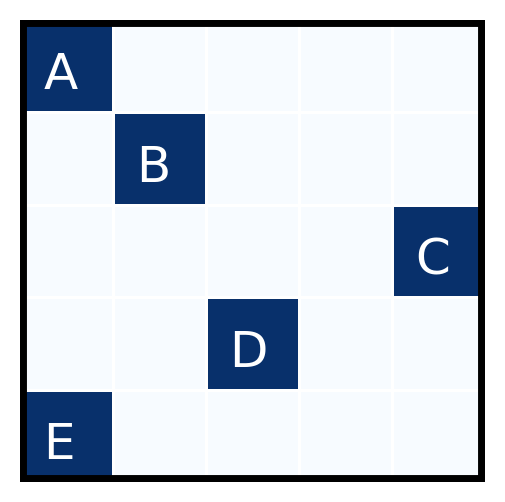

In [4]:
# target relationship
rng = np.random.RandomState(2)
stim_ind = np.sort(rng.choice(n_items**2, size=n_items, replace=False))
stim_ind = np.sort(stim_ind)
stim_ind[4] = 20
stim = np.zeros([n_items**2,])
stim[stim_ind] = 1
stim = stim.reshape([n_items, n_items])
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
ax = axs
show_mat(ax, stim, range(9))

In [5]:
# get some observation
obs_loc = [[0, 4], [1, 8], [5, 6], [0, 7], [2, 3]]
obs_ind = [[0, 1], [1, 3], [3, 4], [1, 3], [2, 3]]
obs_lst = []
for loc, ind in zip(obs_loc, obs_ind):
    obs = np.zeros([9])
    obs[loc] = 1
    obs_lst.append((obs.reshape([3, 3]).copy(), ind))
    

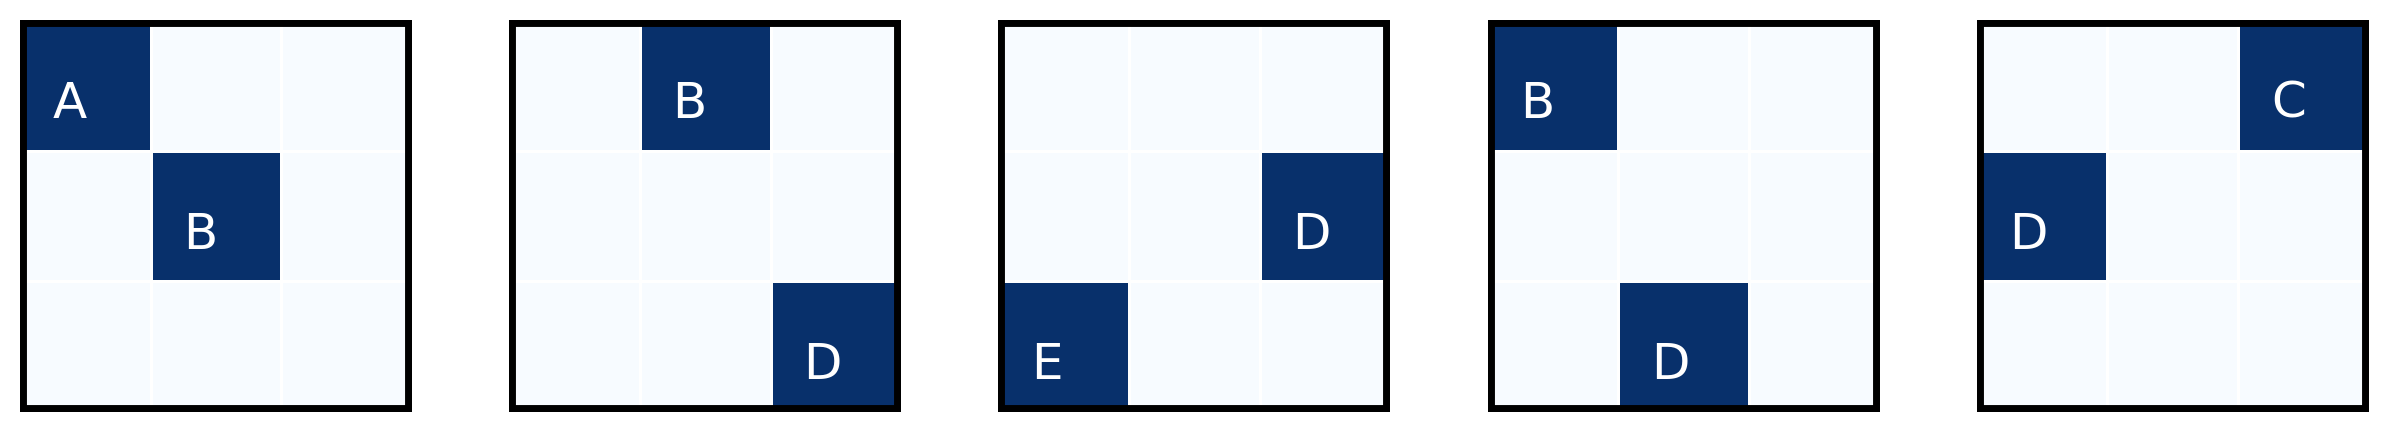

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(2.5*5, 2.5))
for i in range(len(obs_lst)):
    ax = axs[i]
    stim, ind = obs_lst[i]
    show_mat(ax, stim, ind)
    ax.set_box_aspect(1)
fig.tight_layout()

In [7]:
def code_input(obs):
    stim, ind = obs
    loc = np.vstack(np.where(stim==1)).T
    rel = loc[0, :] - loc[1, :]
    return ind[0], ind[1], rel[1], -rel[0]

In [8]:
def show_filters(filters_x, filters_y):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    for i in range(n_filters):
        ax = axs[i//3, i%3]
        for j in range(n_items):
            ax.text(filters_x[i, j], filters_y[i, j], lst[j])
        ax.set_title(f'Filter{i}')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_box_aspect(1)
    fig.tight_layout()

weight: [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


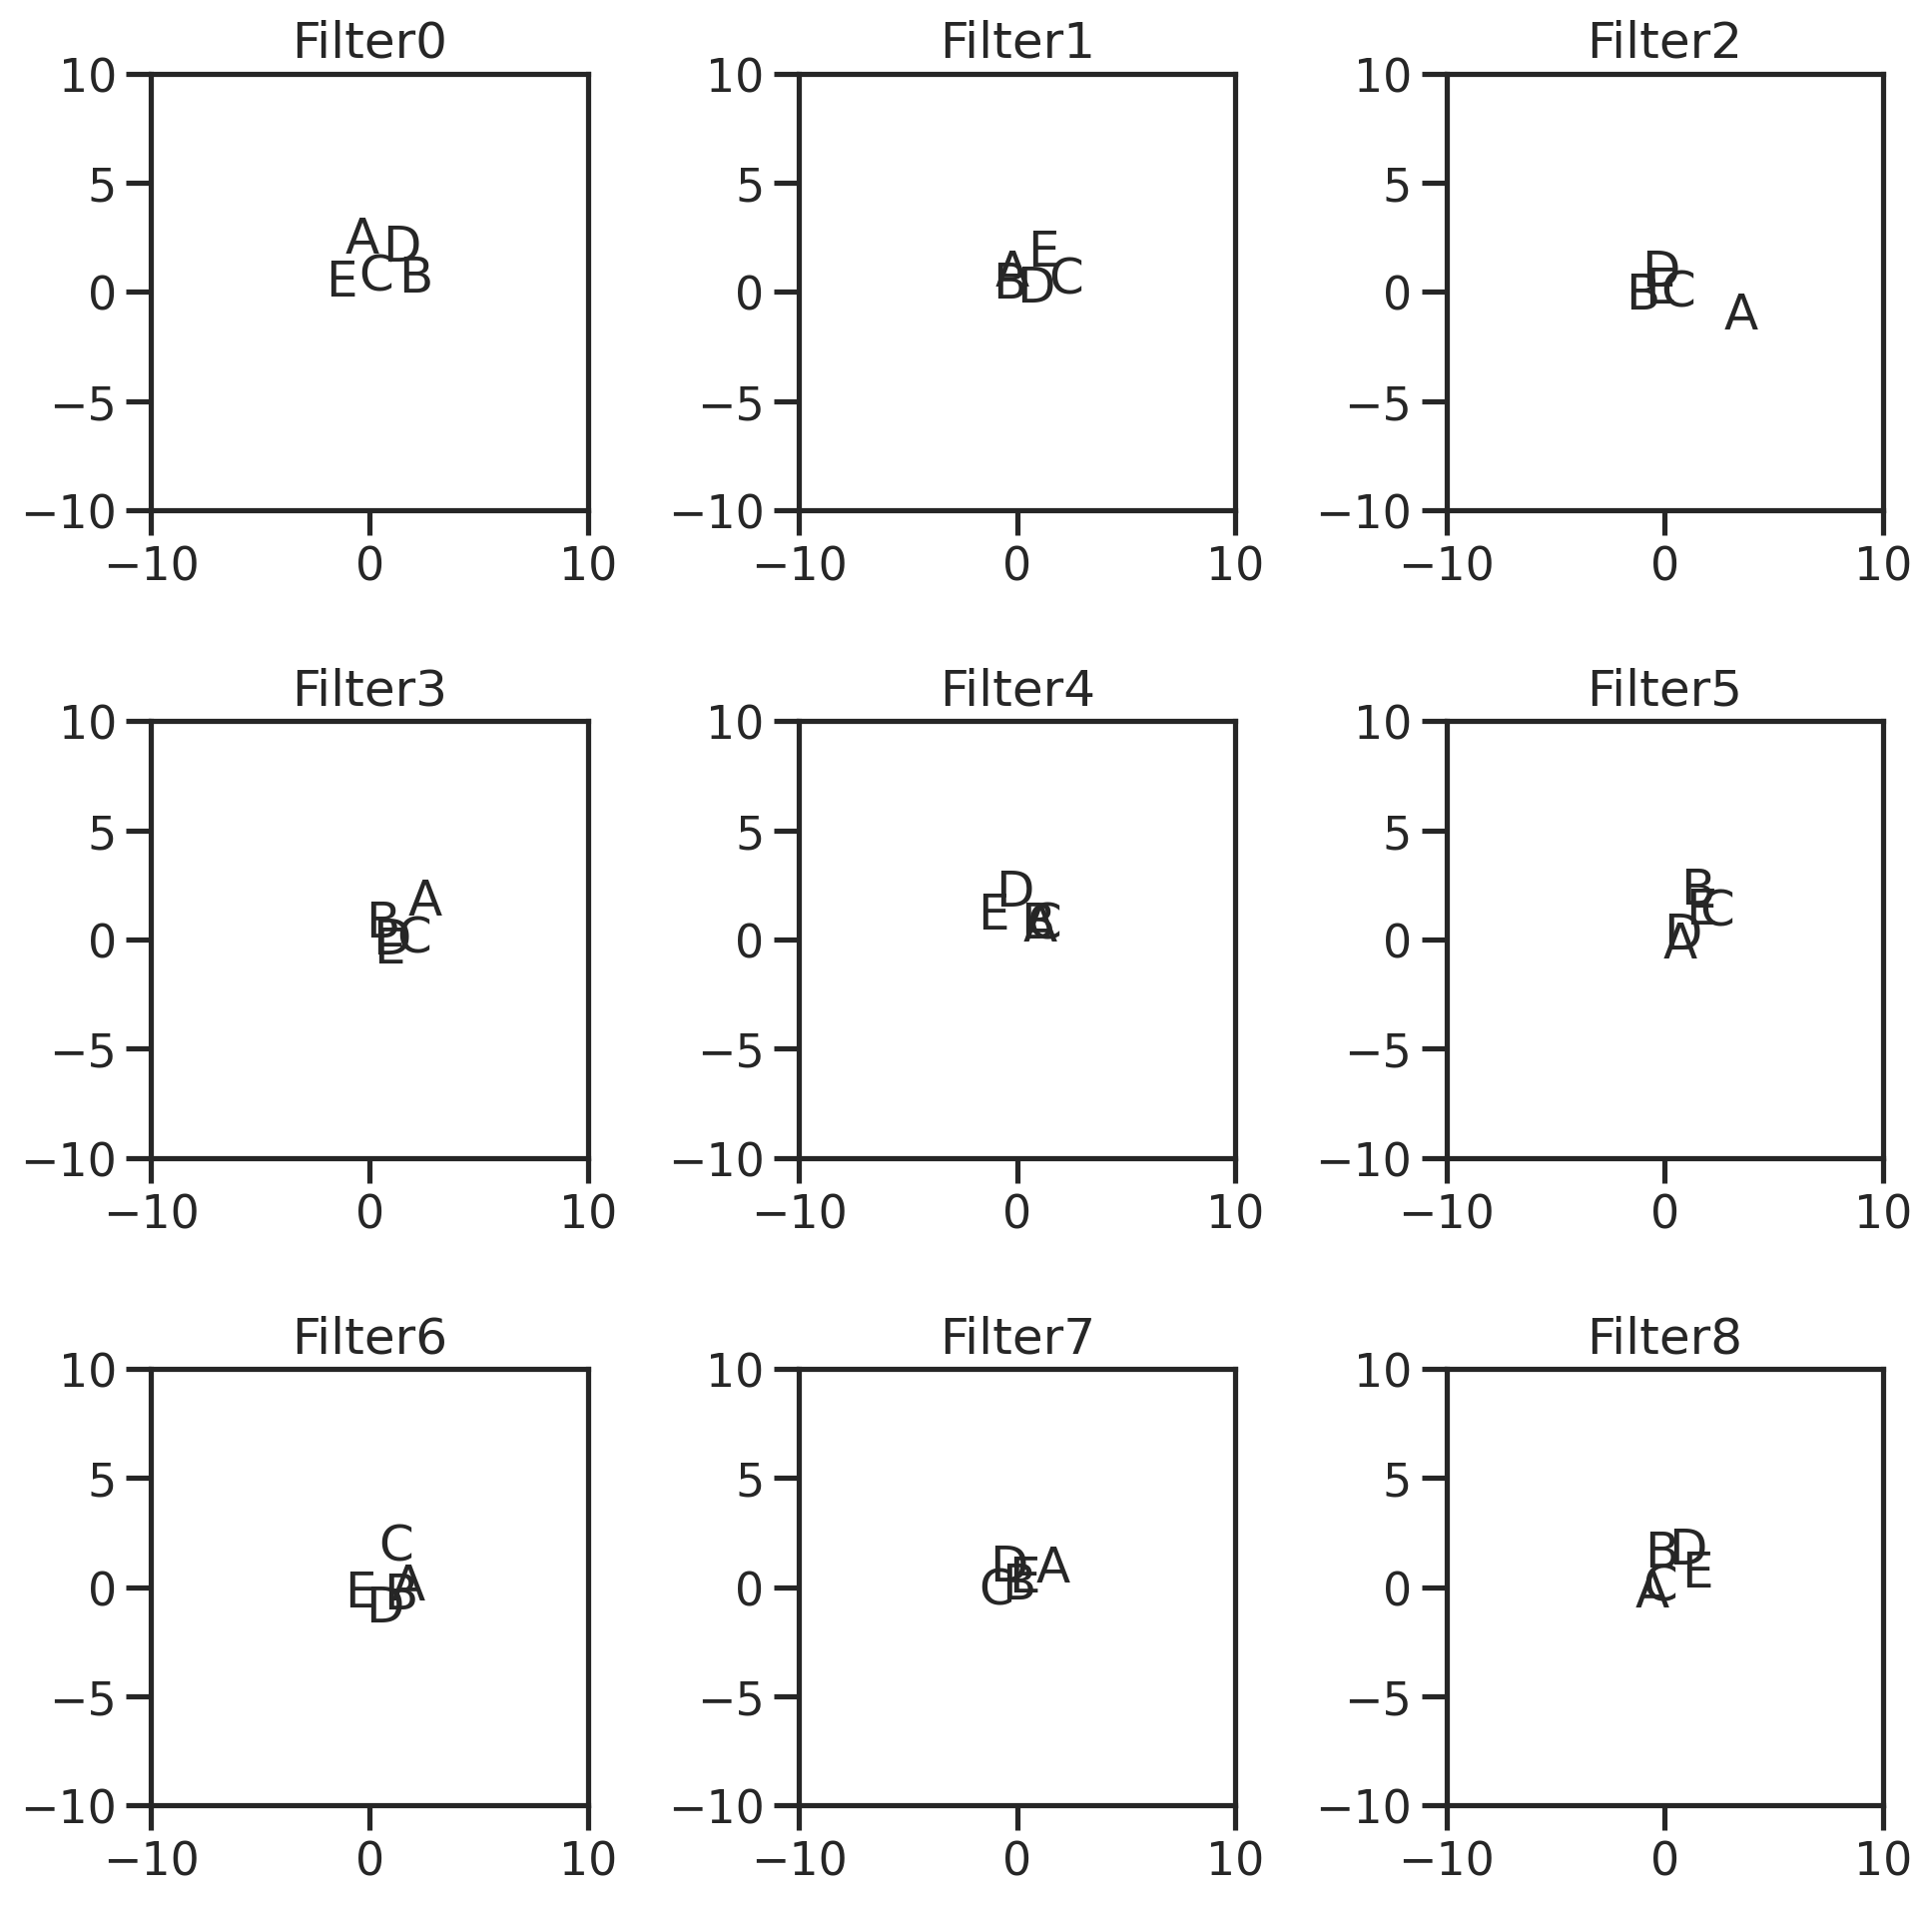

In [9]:
model  = particleFilter2D(params=params, 
            n_items=n_items, seed=seed)
show_filters(model.filters_x, model.filters_y)    
print(f'weight: {model.weights}')  

(0, 1, -1, 1)

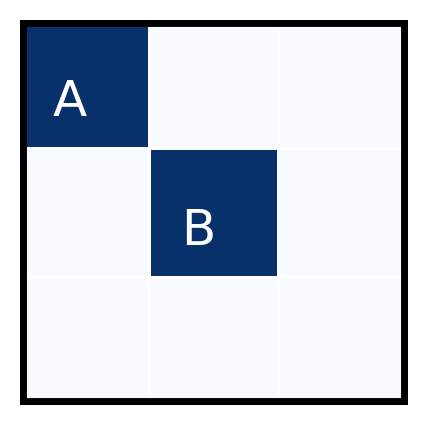

In [10]:
stim, ind = obs_lst[0]
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
show_mat(ax, stim, ind)
code_input(obs_lst[0])

weight: [0.46905163 0.14250349 0.00145676 0.04408119 0.10301551 0.02526961
 0.11838979 0.05589861 0.04033341]


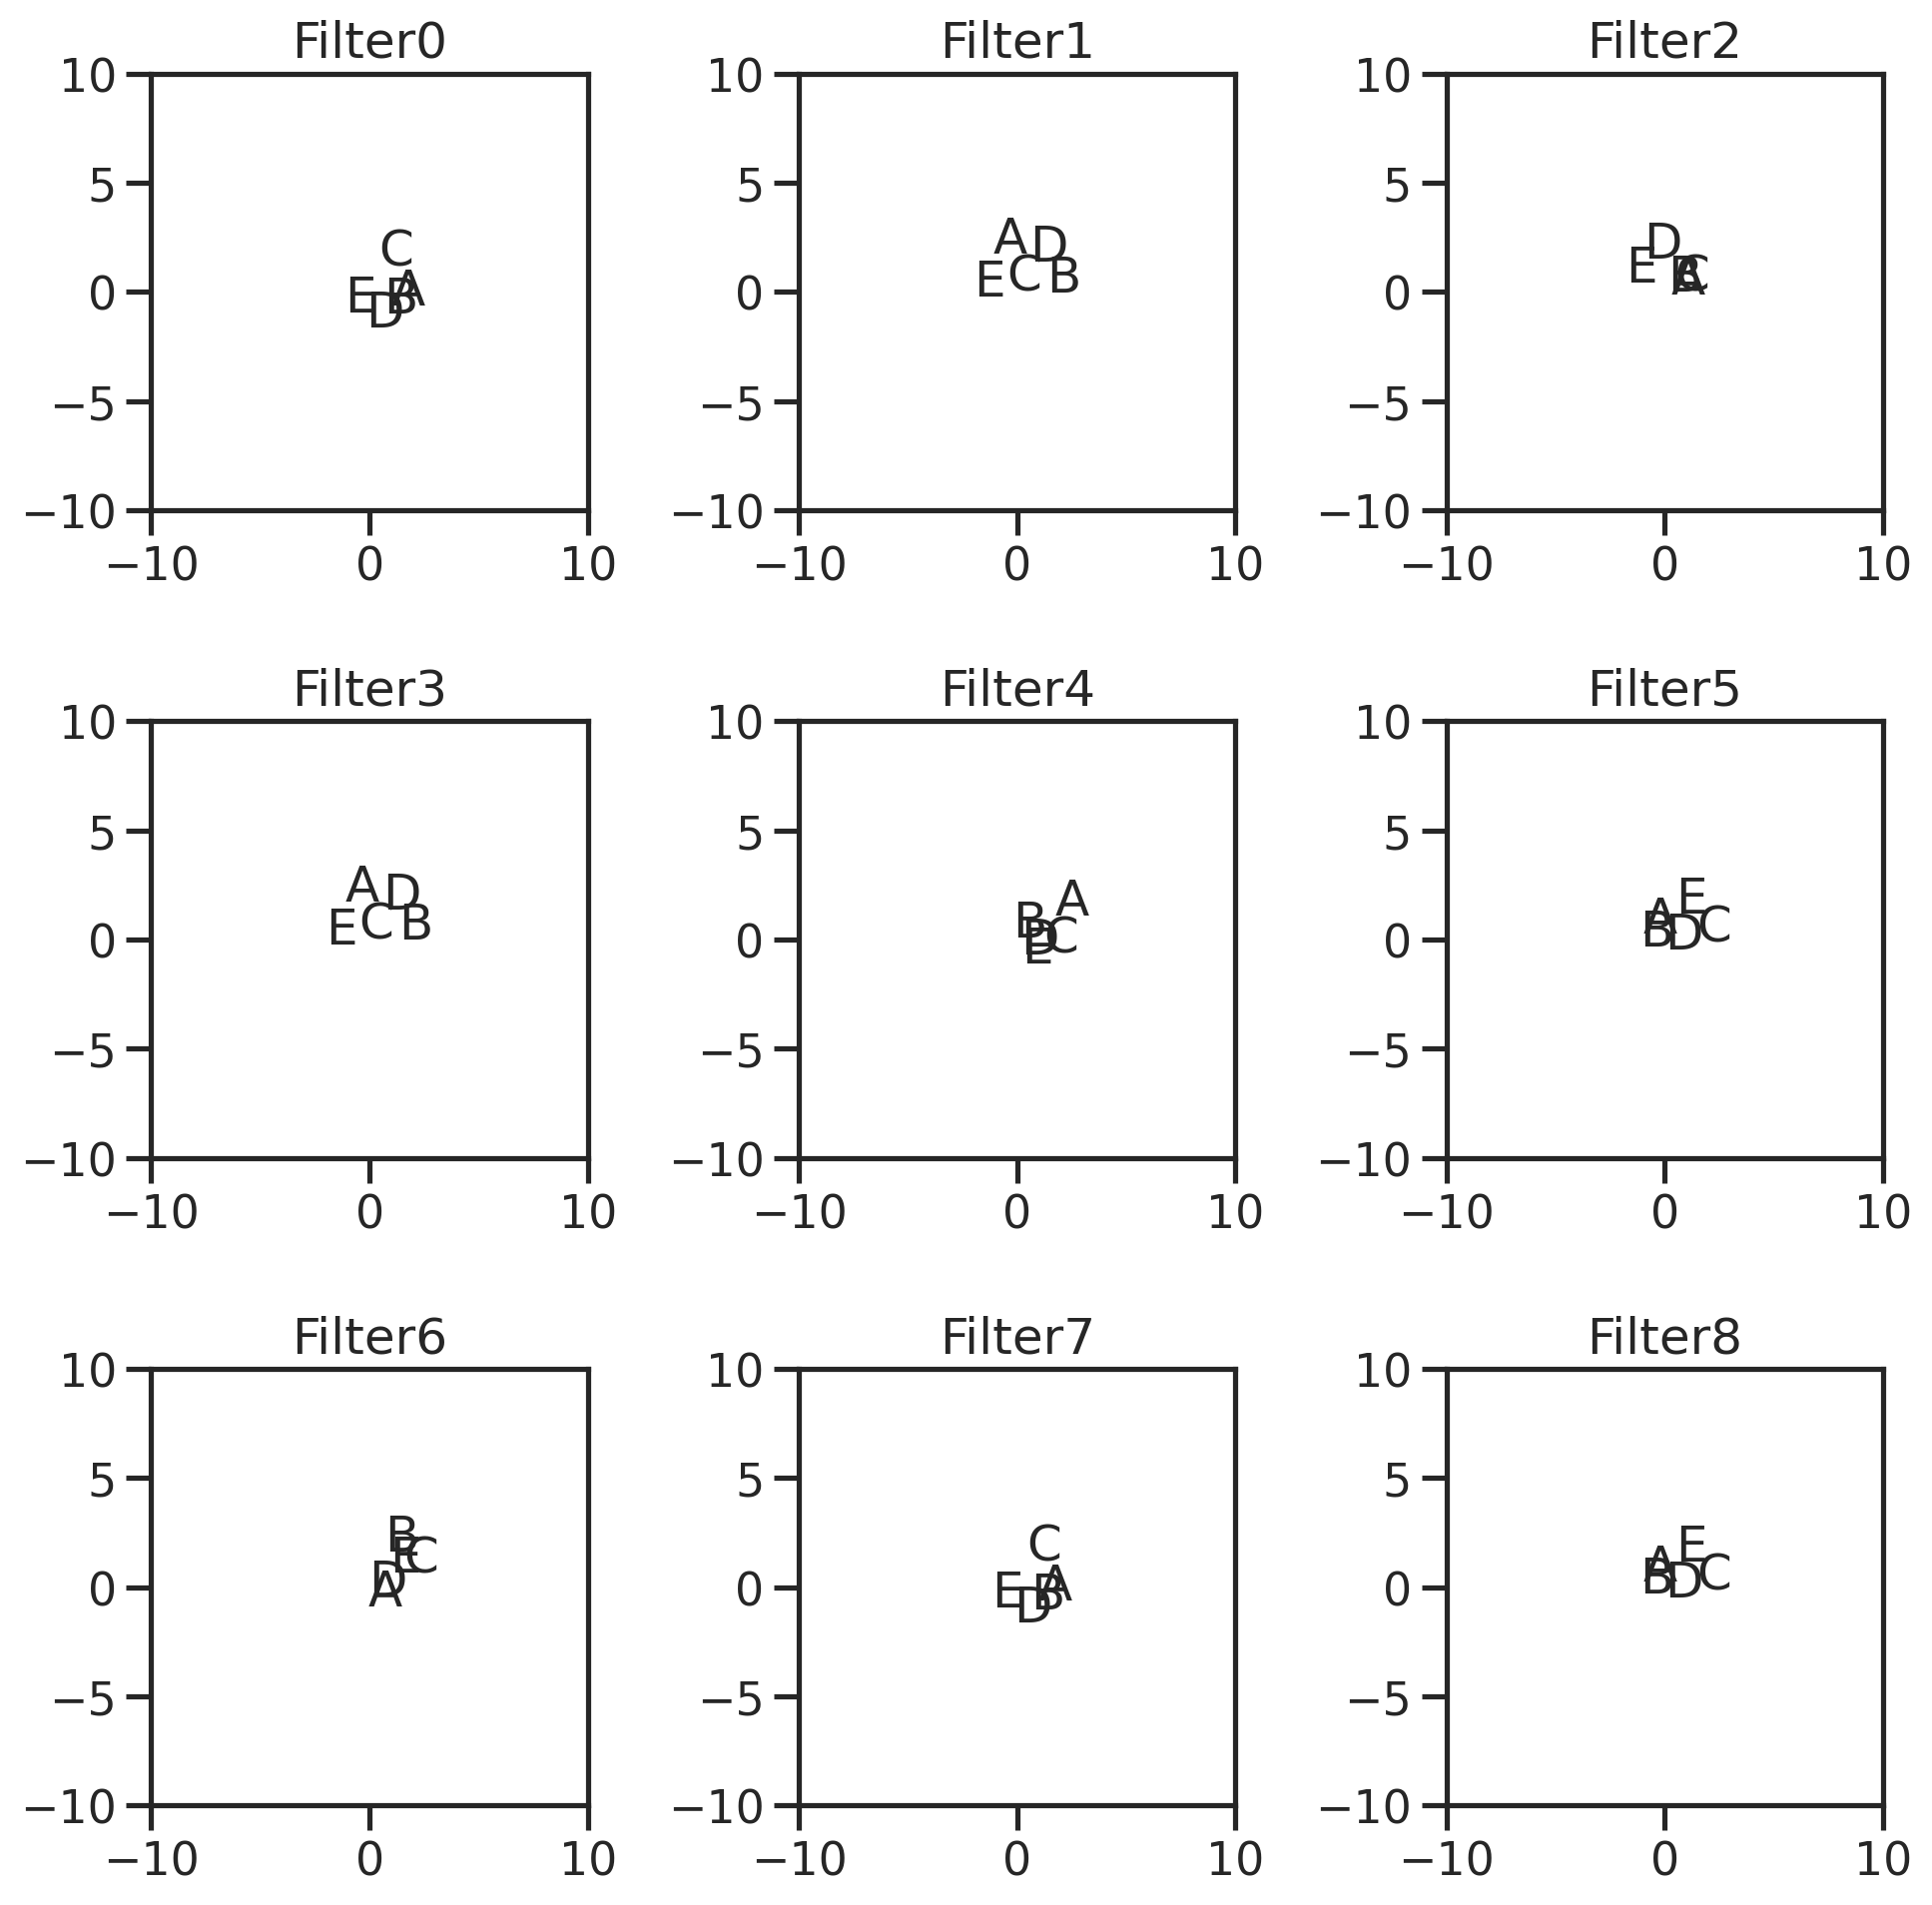

In [11]:
model.reweight(code_input(obs_lst[0]))
print(f'weight: {model.weights}')  
model.resampling()
show_filters(model.filters_x, model.filters_y)    


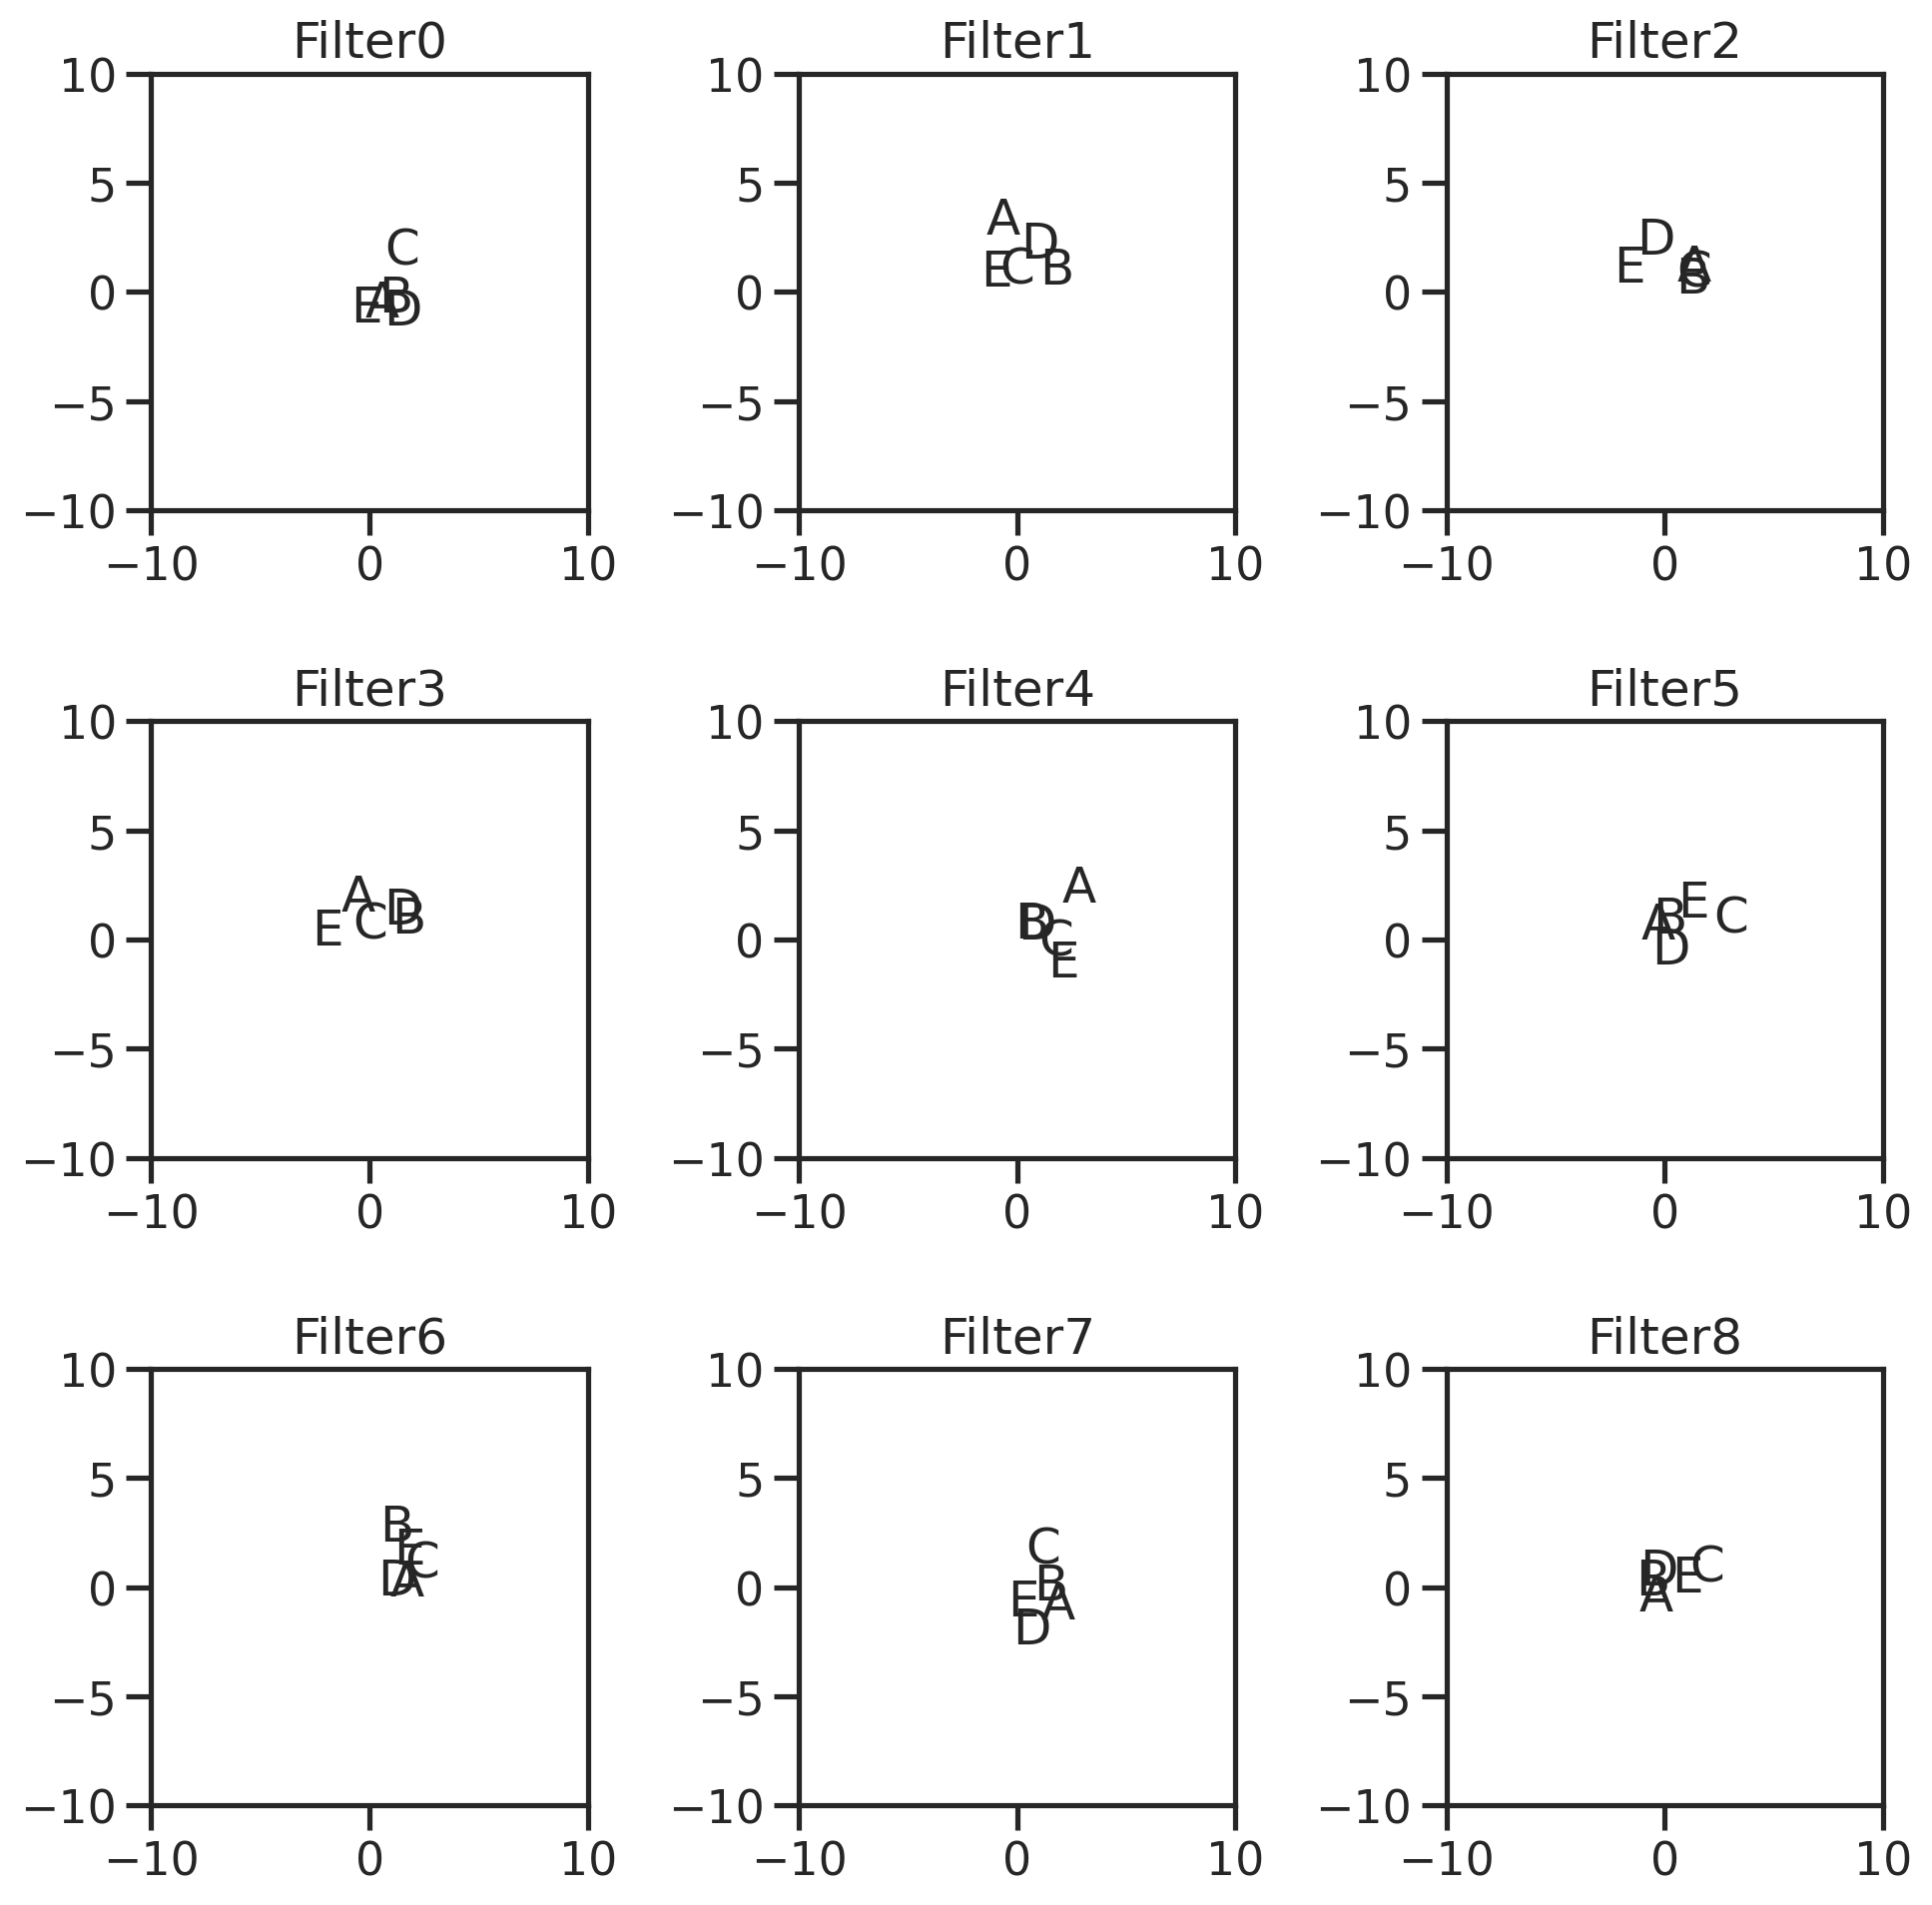

In [12]:
model.propagation()
show_filters(model.filters_x, model.filters_y)    

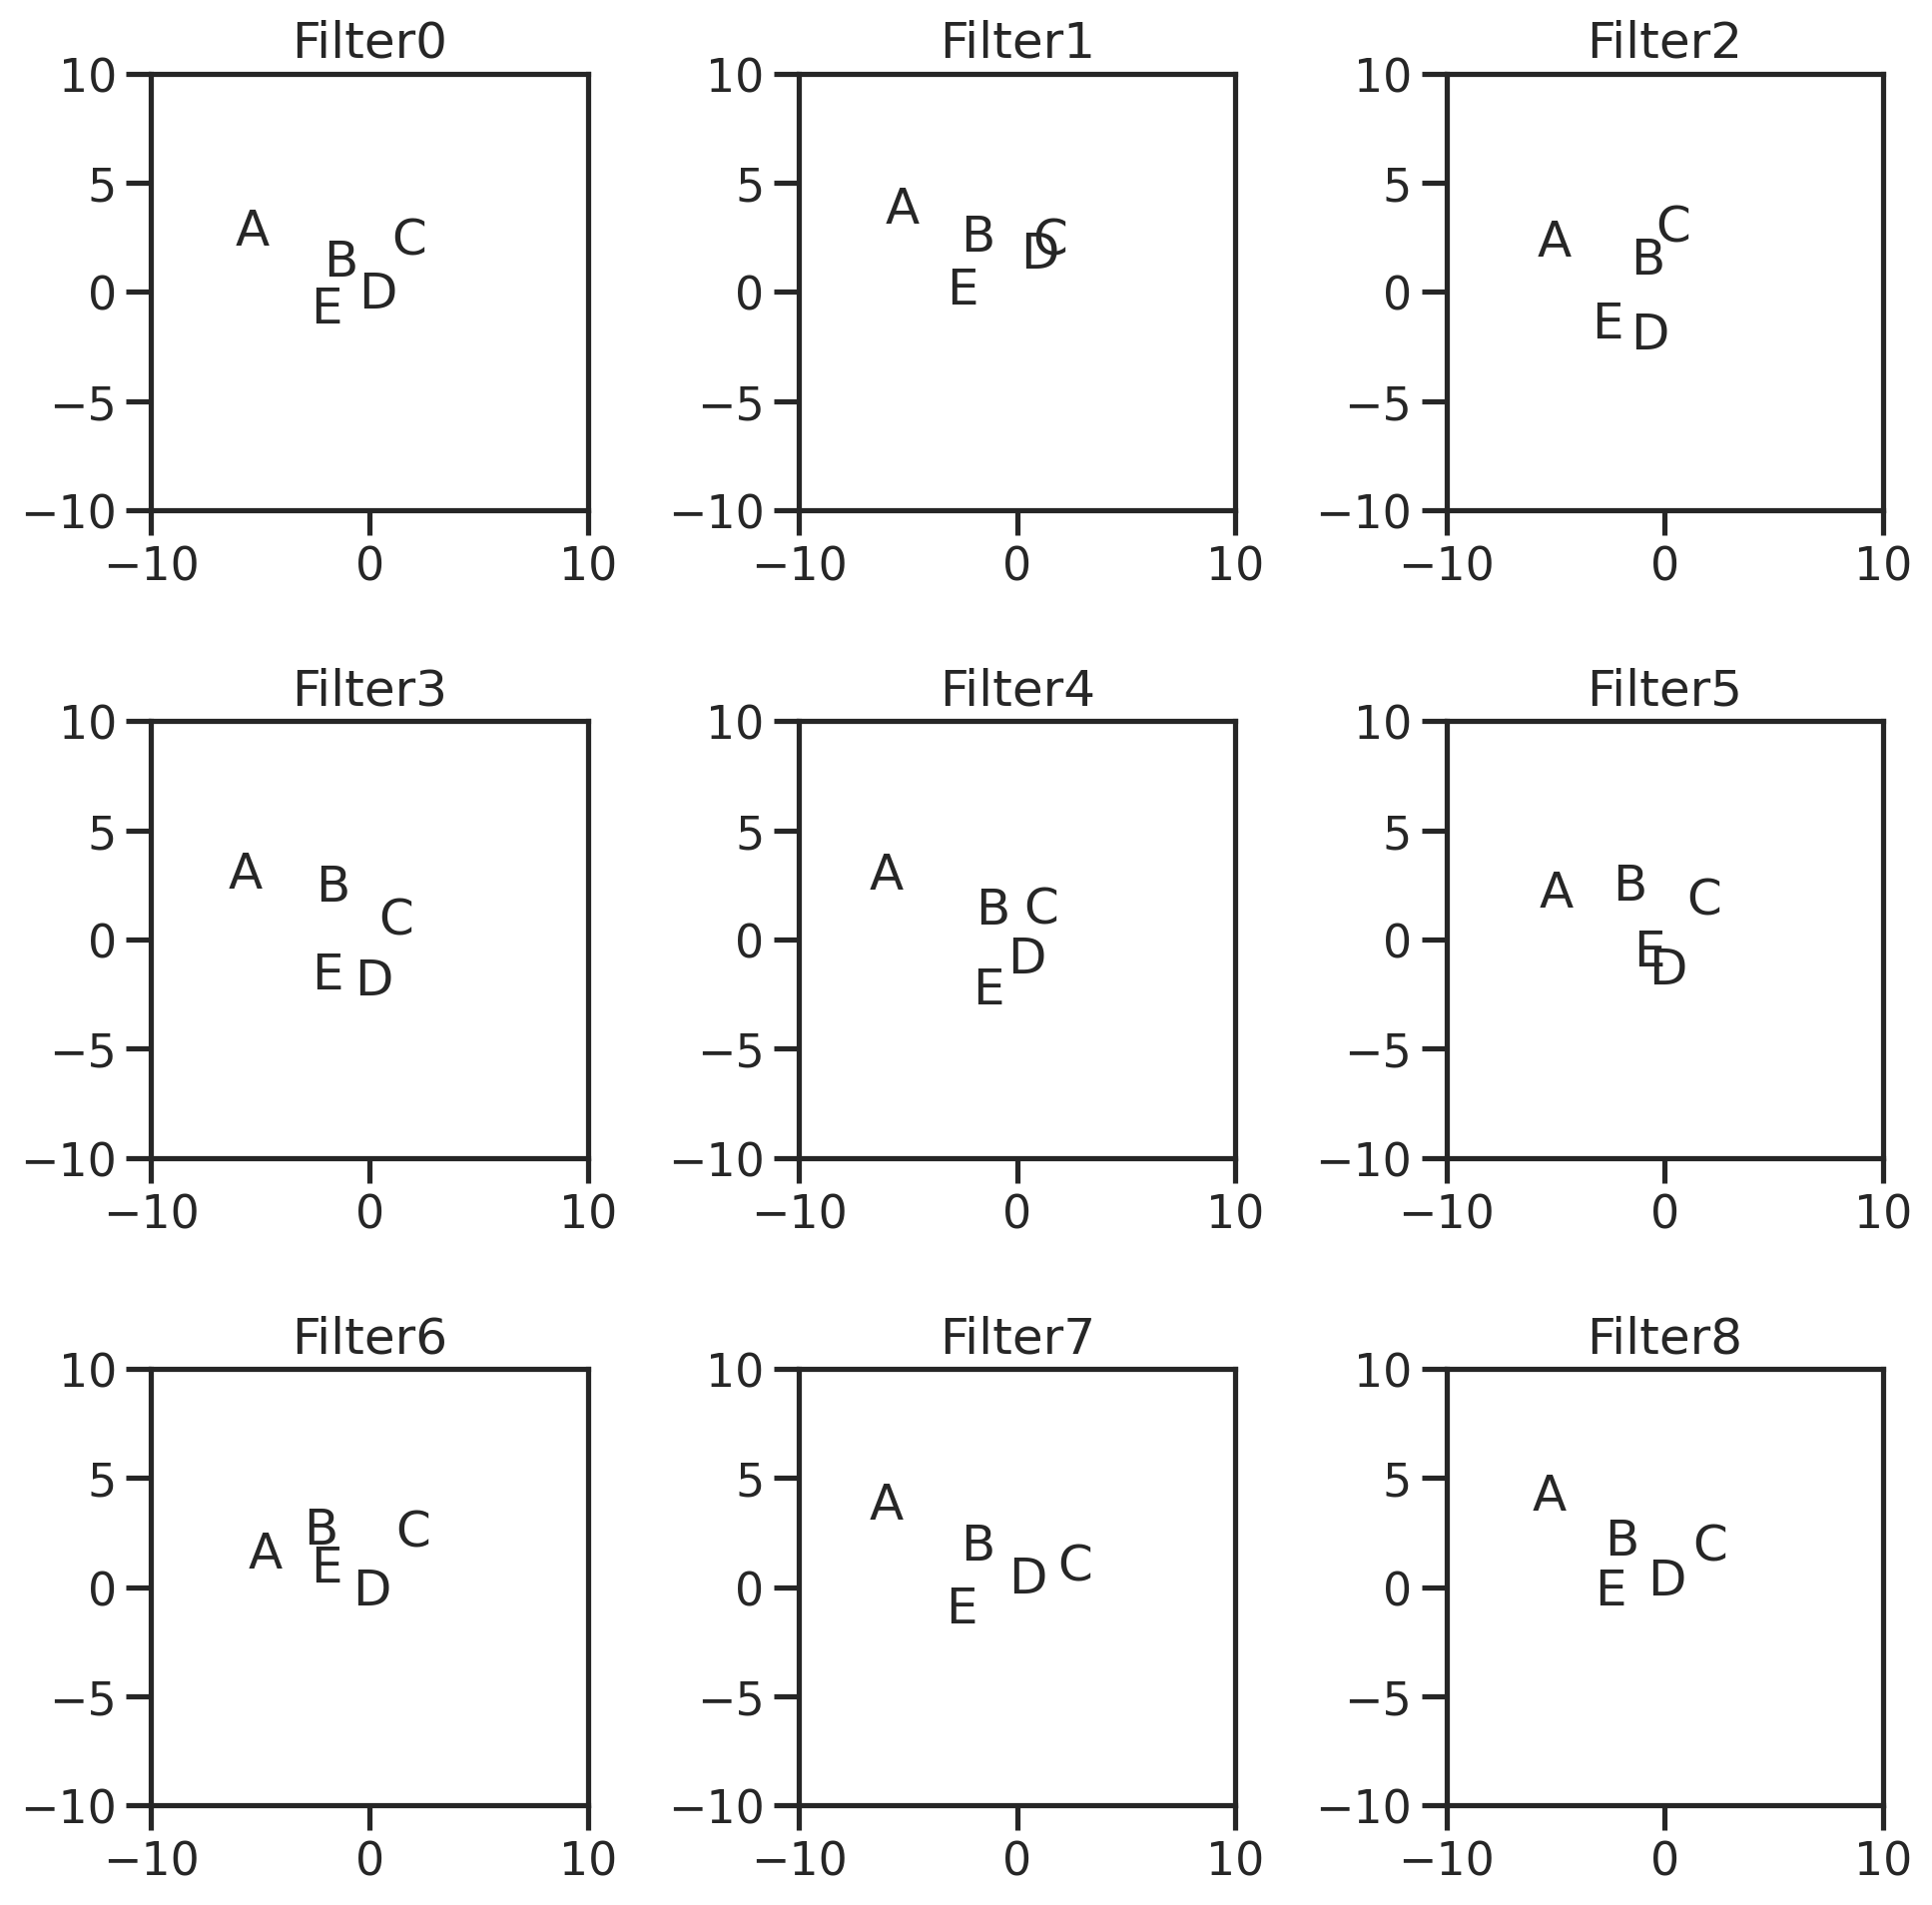

In [74]:
rng = np.random.RandomState(7)
tasks = []
for _ in range(10):
    task_cp = obs_lst.copy()
    rng.shuffle(task_cp)
    tasks += task_cp
seed = 203
params = [1, .45, 1, n_filters, .2]
model  = particleFilter2D(params=params, 
                n_items=n_items, seed=seed)
for task in tasks:
    model.step(code_input(task))
    clear_output(True)
    show_filters(model.filters_x, model.filters_y) 
    plt.show()
    sleep(.1)

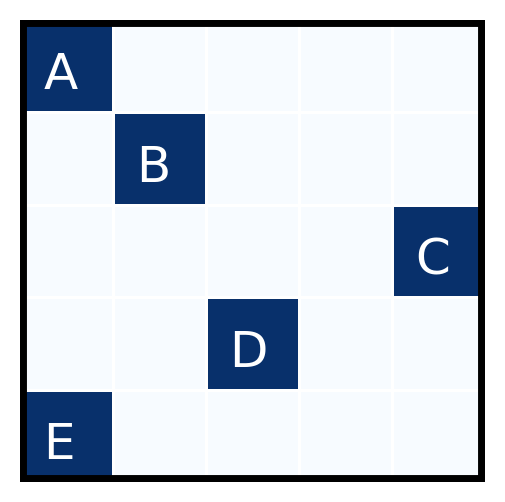

In [14]:
rng = np.random.RandomState(2)
stim_ind = np.sort(rng.choice(n_items**2, size=n_items, replace=False))
stim_ind = np.sort(stim_ind)
stim_ind[4] = 20
stim = np.zeros([n_items**2,])
stim[stim_ind] = 1
stim = stim.reshape([n_items, n_items])
fig, axs = plt.subplots(1, 1, figsize=(3, 3))
ax = axs
show_mat(ax, stim, range(9))